In [217]:
import pandas as pd
import numpy as np
import math
import plotly as pl
import plotly.express as px
import math
from scipy.spatial.distance import cdist, squareform

Training Data:

In [218]:
n = 24

In [219]:
in_array = np.linspace(-np.pi * 2, np.pi * 2, n)

x1 = in_array * 5 + 5
x2 = in_array * -10 - 5
x3 = in_array * 2 + 5

noise = np.random.normal(0,1,n)
y = 5 * np.cos(in_array) + noise

In [220]:
x_tmp = []
for i in range(0,n): x_tmp.append([x1[i],x2[i],x3[i]])
x = np.array(x_tmp)

Plot Data:

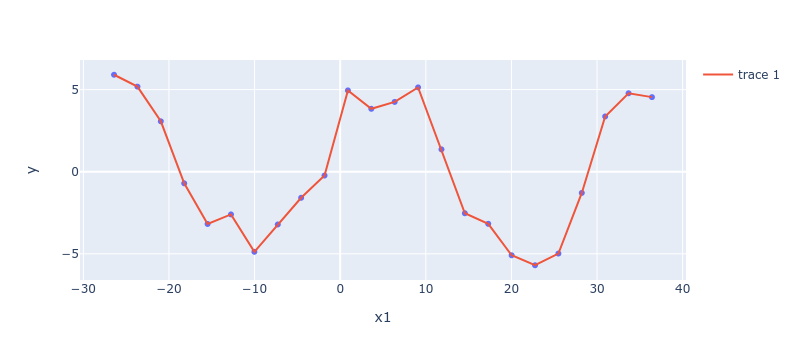

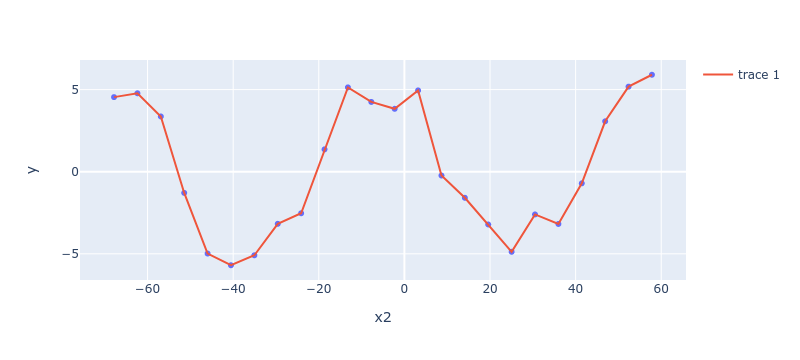

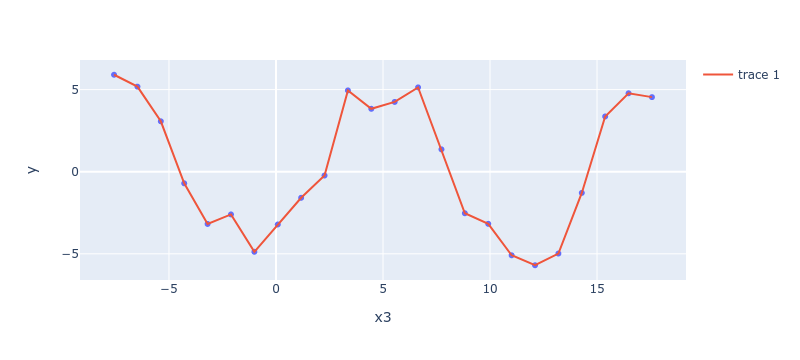

In [221]:
tmp = pd.DataFrame({'x1': (np.asarray(x[:,0])).flatten(),
                    'x2': (np.asarray(x[:,1])).flatten(),
                    'x3': (np.asarray(x[:,2])).flatten(),
                    'y': (np.asarray(y)).flatten()
                   })

### x1

fig = px.scatter(tmp, x="x1", y="y")
fig = fig.add_scatter(x=tmp["x1"], y=tmp["y"])
fig.show()


### x2


fig = px.scatter(tmp, x="x2", y="y")
fig = fig.add_scatter(x=tmp["x2"], y=tmp["y"])


fig.show()

### x3

fig = px.scatter(tmp, x="x3", y="y")
fig = fig.add_scatter(x=tmp["x3"], y=tmp["y"])
fig.show()

Add Bias:

In [222]:
#x = np.c_[ x, np.ones(x.shape[0]) ] 
#print(x)

Train:

In [223]:
s = 5
pairwise_sq_dists = cdist(x, x, 'sqeuclidean')
K = np.exp(-pairwise_sq_dists / s**2)

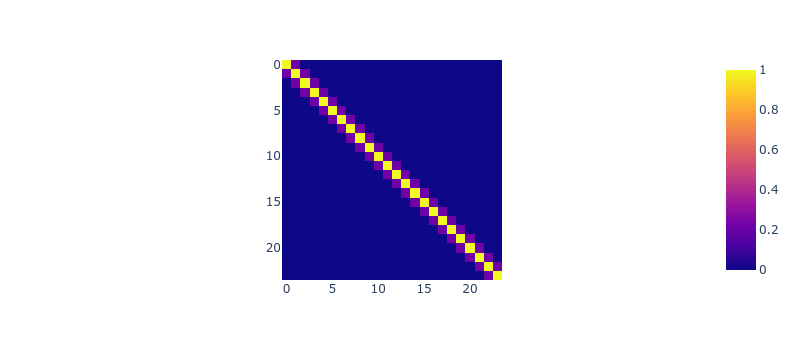

In [224]:
fig = px.imshow(K)
fig.show()

Random Coefficients:

In [225]:
a = np.random.rand(x.shape[0])
print(a)

[0.12130729 0.65567119 0.78542396 0.53250992 0.25870286 0.89941809
 0.08823929 0.8807082  0.1951482  0.03549643 0.70539945 0.63476793
 0.46560021 0.59544497 0.39971332 0.15305354 0.16313192 0.64534488
 0.57453129 0.26426945 0.72437312 0.77496658 0.28909665 0.45589407]


In [226]:
def pred(x, z, s):
    
    pred = 0

    for i in range(0,x.shape[0]):

        dist_i = np.linalg.norm(z - x[i])
        k_i = np.exp(-dist_i / s**2)
        pred = pred + (k_i * a[i])
    
    return pred

In [227]:
div = 0

for i in range(0,x.shape[0]):
    
    y_i = y[i]
    x_i = (np.asarray(x[i])).flatten()
    div = div + ((y_i - pred(x, x[i], s))**2) 
    
print("MSR:", div)
print("MSR norm:", math.sqrt(div / x.shape[0]))

MSR: 598.4396124763009
MSR norm: 4.993494152713028


Calculate a:

In [228]:
a = np.linalg.inv(K).dot(y)

Make Prediction:

In [229]:
z = x[9]
pred(x, z, s)

1.5014248914737003

In [230]:
y_pred = []

for i in range(0,x.shape[0]):
    pred_i = pred(x, x[i], s)
    y_pred.append(pred_i)

print(y_pred)

[6.87492960981906, 6.235483462368219, 4.197279565125022, 1.1962656908466383, -1.413300218524255, -2.7021029029415087, -3.607510244009025, -2.6402215053534457, -0.7739502872696091, 1.5014248914737003, 4.393547382057694, 5.201361167942165, 5.2235024332276785, 4.1464131181432355, 1.1554506294925615, -2.2316310561982693, -4.58547351514544, -6.295842441383896, -6.483365463297058, -5.046024189313144, -1.972485172635368, 1.5177697242951185, 3.6581569682679933, 4.348559672629825]


In [231]:
div = 0

for i in range(0,x.shape[0]):
    
    y_i = y[i]
    x_i = (np.asarray(x[i])).flatten()
    div = div + ((y_i - pred(x, x[i], s))**2) 
    
print("MSR:", div)
print("MSR norm:", math.sqrt(div / x.shape[0]))

MSR: 29.18005543090503
MSR norm: 1.102649374440659


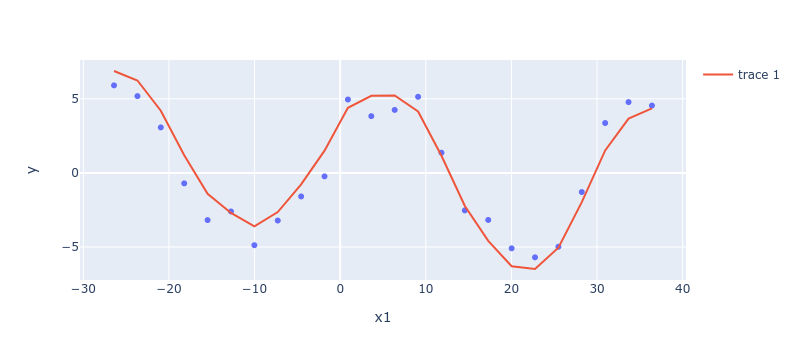

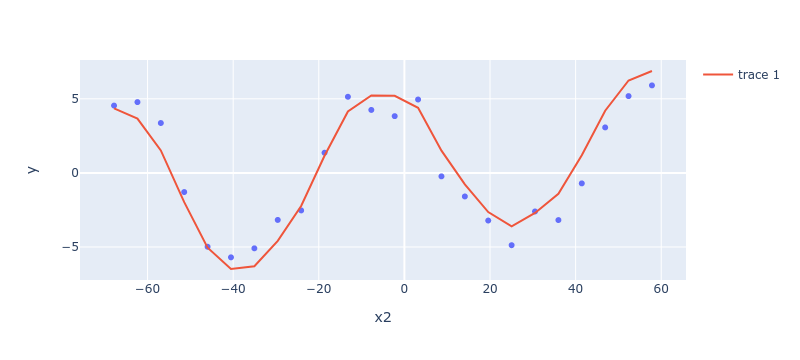

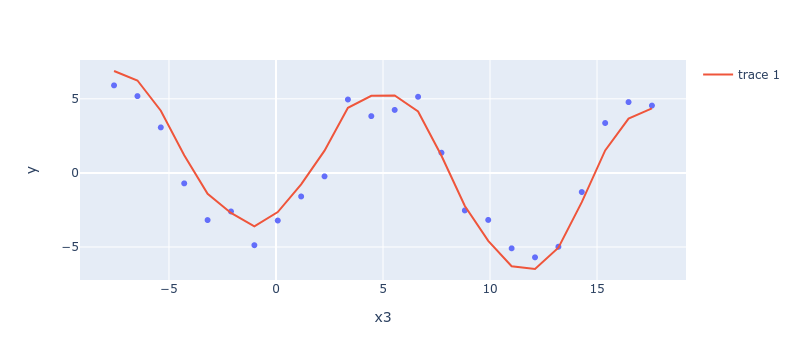

In [232]:
tmp = pd.DataFrame({'x1': (np.asarray(x[:,0])).flatten(),
                    'x2': (np.asarray(x[:,1])).flatten(),
                    'x3': (np.asarray(x[:,2])).flatten(),
                    'y': (np.asarray(y)).flatten(),
                    'y_pred': (np.asarray(y_pred)).flatten(),
                   })

### x1

fig = px.scatter(tmp, x="x1", y="y")
fig = fig.add_scatter(x=tmp["x1"], y=tmp["y_pred"])
fig.show()


### x2


fig = px.scatter(tmp, x="x2", y="y")
fig = fig.add_scatter(x=tmp["x2"], y=tmp["y_pred"])


fig.show()

### x3

fig = px.scatter(tmp, x="x3", y="y")
fig = fig.add_scatter(x=tmp["x3"], y=tmp["y_pred"])
fig.show()

Compare with linear Regression:

In [233]:
x = np.c_[ x, np.ones(x.shape[0]) ] 
print(x)

[[-26.41592654  57.83185307  -7.56637061   1.        ]
 [-23.68410684  52.36821367  -6.47364273   1.        ]
 [-20.95228714  46.90457428  -5.38091486   1.        ]
 [-18.22046744  41.44093488  -4.28818698   1.        ]
 [-15.48864774  35.97729548  -3.1954591    1.        ]
 [-12.75682804  30.51365608  -2.10273122   1.        ]
 [-10.02500834  25.05001669  -1.01000334   1.        ]
 [ -7.29318864  19.58637729   0.08272454   1.        ]
 [ -4.56136895  14.12273789   1.17545242   1.        ]
 [ -1.82954925   8.65909849   2.2681803    1.        ]
 [  0.90227045   3.1954591    3.36090818   1.        ]
 [  3.63409015  -2.2681803    4.45363606   1.        ]
 [  6.36590985  -7.7318197    5.54636394   1.        ]
 [  9.09772955 -13.1954591    6.63909182   1.        ]
 [ 11.82954925 -18.65909849   7.7318197    1.        ]
 [ 14.56136895 -24.12273789   8.82454758   1.        ]
 [ 17.29318864 -29.58637729   9.91727546   1.        ]
 [ 20.02500834 -35.05001669  11.01000334   1.        ]
 [ 22.7568

In [234]:
m1 = np.linalg.inv((x.transpose()).dot(x))
m2 = (x.transpose()).dot(y)

B_new = m1.dot(m2)

print(B_new)

[-0.09375   -0.046875  -0.0234375  0.5625   ]


In [235]:
y_pred = B_new.dot(x.T)

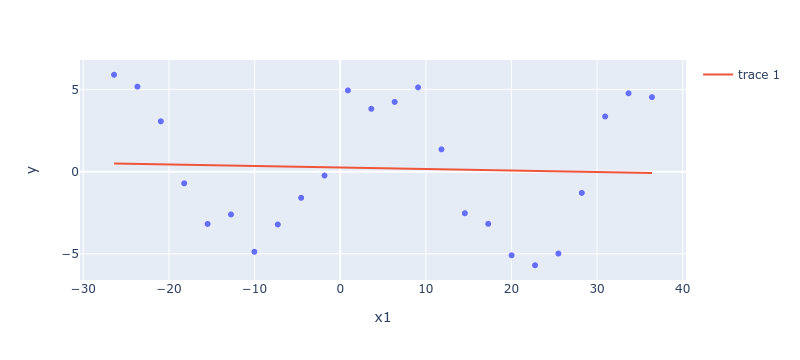

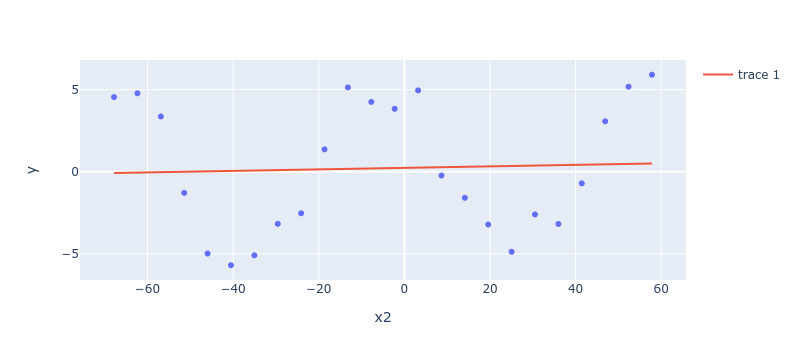

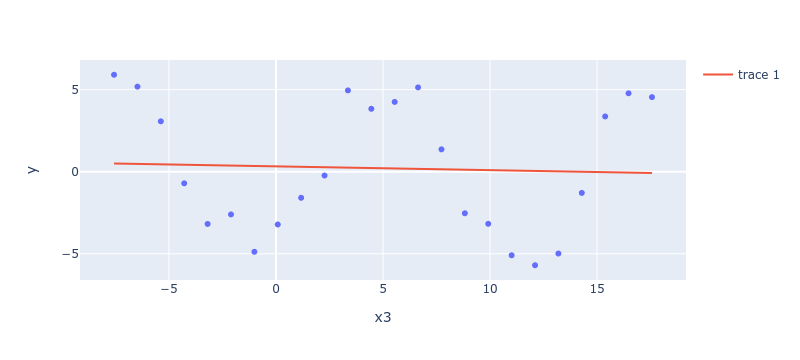

In [236]:
tmp = pd.DataFrame({'x1': (np.asarray(x[:,0])).flatten(),
                    'x2': (np.asarray(x[:,1])).flatten(),
                    'x3': (np.asarray(x[:,2])).flatten(),
                    'y': (np.asarray(y)).flatten(),
                    'y_pred': (np.asarray(y_pred)).flatten(),
                   })

### x1

fig = px.scatter(tmp, x="x1", y="y")
fig = fig.add_scatter(x=tmp["x1"], y=tmp["y_pred"])
fig.show()


### x2


fig = px.scatter(tmp, x="x2", y="y")
fig = fig.add_scatter(x=tmp["x2"], y=tmp["y_pred"])


fig.show()

### x3

fig = px.scatter(tmp, x="x3", y="y")
fig = fig.add_scatter(x=tmp["x3"], y=tmp["y_pred"])
fig.show()